## Analyze A/B Test Results
## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [71]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [72]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [73]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [74]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [75]:
df_convert = df.query('converted==1').user_id.nunique()/df.user_id.nunique()

In [76]:
df_convert

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [77]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [78]:
df.isnull().sum().any()

False

In [79]:
#run df.info() also shows there are no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [80]:
df2=df.query('group=="treatment" and landing_page =="new_page"or group=="control" and landing_page =="old_page"')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [81]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [82]:
#df2.info() shows the number of user_id as well as the other columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [83]:
#The number of unique user_id
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [84]:
# The repeated user_id is 773192
df2['user_id'].value_counts().head(3)

773192    2
630732    1
811737    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [85]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [86]:
df2=df2.drop_duplicates(subset='user_id', keep='first')

In [87]:
print(sum(df2.duplicated()))

0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [88]:
p_converted=df2.query('converted==1').user_id.nunique()/df2.user_id.nunique()
p_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [89]:
df_control=df2.query('group=="control"')
df_control.query('converted==1').user_id.nunique()/df_control.user_id.nunique()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [90]:
df_treatment=df2.query('group=="treatment"')
df_treatment.query('converted==1').user_id.nunique()/df_treatment.user_id.nunique()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [91]:
df2.query('landing_page=="new_page"').user_id.nunique()/df2.user_id.nunique()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- The probability of an individual, regardless of the page they receive is 0.1196(11.96%).
- Given that an individual was in the control group, the probability they converted is 0.1204(12.04%).
- Given that an individual was in the treatment group, the probability they converted is 0.1188(11.88%).
- Both groups received the pages equally (~50% each).
- The probability users converted in both control and treatment groups are pretty similar to each other and the probability of an individual converting regardless of the page they receive. **Therefore, there is no sufficient evidence to support the statement that one page leads to more conversions**.
- This difference is small, and we might benefit from more testing.


In [92]:
#The number of days that test has been run
df2['timestamp'].min(), df2['timestamp'].max()


('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

- The test has been run for 22 days, which seems like an adequate amount of time (especially considering we
tested more than 290,000 unique users).
- We need to make further experiments such as A/B testing to make a conclusion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 𝐻0: 𝑝𝑛𝑒𝑤-𝑝𝑜𝑙𝑑 <= 0
 
 𝐻1: 𝑝𝑛𝑒𝑤-𝑝𝑜𝑙𝑑 > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [93]:
# according to question 2 in Part II, p_new=p_old=p_converted 
p_new=p_old=p_converted
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [94]:
p_new=p_old=p_converted
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [95]:
n_new=df_treatment.shape[0]
n_new


145310

d. What is $n_{old}$, the number of individuals in the control group?

In [96]:
n_old=df_control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [97]:
# np.random.binomial(n, p, size)
# n=1 trial size, p=probabiity of trial, size=number of trials to run
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([1, 1, 0, ..., 0, 0, 1])

In [98]:
new_page_converted.mean()


0.12108595416695341

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [99]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
old_page_converted.mean()


0.12057216019384061

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [101]:
#observed simulated difference for one test
new_page_converted.mean()-old_page_converted.mean()



0.00051379397311279718

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [102]:
new_page_simulated=np.random.binomial(n_new, p_new, 10000)/n_new
old_page_simulated=np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs=new_page_simulated-old_page_simulated


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

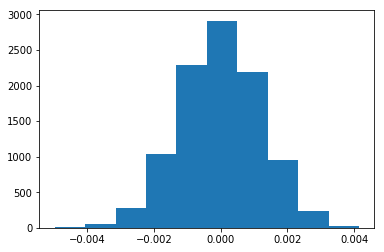

In [103]:
plt.hist(p_diffs);

Yes, according to the **Central Limit Theorem**, with a large enough sample size the sample mean follows a
normal distribution (bell shaped) as expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [104]:
actual_diffs=df2.query('group=="treatment"')['converted'].mean()-df2.query('group=="control"')['converted'].mean()
actual_diffs

-0.0015782389853555567

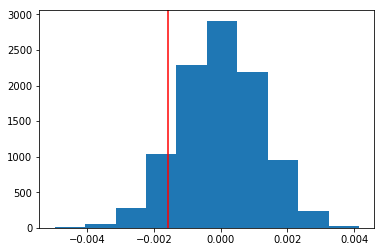

In [105]:
plt.hist(p_diffs)
plt.axvline(actual_diffs, color='red');

In [106]:
p_diffs=np.array(p_diffs)
p_val=(p_diffs>actual_diffs).mean()
p_val

0.90180000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We calculated the p_value. P-value is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

Type I error threshold (alpha) is 0.05. The p_value is 0.90. Since the p-value is greater than the alpha, observing the data from the null is not unlikely, so we fail to reject the null hypothesis. In other words, since the p_value is greater than the alpha, we cannot conclude that a significant difference exists. Therefore, we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [107]:
import statsmodels.api as sm

convert_old =df2.query('group=="control" and converted==1').shape[0]
convert_new =df2.query('group=="treatment" and converted==1').shape[0]
n_old =df_control.shape[0] 
n_new =df_treatment.shape[0]
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [108]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [109]:
# Tells us how significant our z-score is
from scipy.stats import norm
norm.cdf(z_score)

0.094941687240975514

In [110]:
 # Tells us what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z-score measures standard deviation(a measure of how many standard deviations below or above the population mean a raw score is), another test of statistical significance that helps us decide whether or not to reject the null. 

Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054, and the p_value is large, we fail to reject the null hypothesis. Therefore, the converted rate for the new page and old page have no profound difference. This result is the same as parts J. and K. result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression, since response variable is categorical variable. Logestic regression is the same as a multiple linear regrssion to predict the categorical response.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [111]:
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2.head(3)


,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [112]:
#Create Logit regression model for conveted variable and  ab_page, and use control as baseline
log=sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results=log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:20:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [114]:
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

In [115]:
1/np.exp(-1.9888), 1/np.exp(-0.0150)

(7.3067603868728614, 1.0151130646157189)

Each of these exponentiated values is the multiplicative change in the odds of conversion occurring.
When you have values that are less than one, it is often advantageous to compute the reciprocal to explain the results more clearly. For each 1 unit decrease in ab_page, the conversion is 1.015 times as likely holding all else constant. Not much of an impact.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- The p-value associated with ab_page is 0.19. The reason that the p_value of Part III is different from the p_value of Part II is that they maintain different hypotheses. Since it is larger than our Type 1 error rate of 0.05, it shows us that the landing page is not statistically significant in predicting whether the viewer converts or not.
- The null and alternative hypotheses for the regression model are H0: p_new = p_old and H1: p_new != p_old, which solely predicts a difference in the two values. This p_value differs from the p-value found in Part II because, in that section, the null and alternative hypotheses were H0: p_new <= p_old and H1: p_new > p_old, which aims to predict which page gets more conversions.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- It is a good idea to consider other factors to add to our regression model. Many factors may affect the result. If we do not consider them, our results not be correct. Also, considering other factors could provide further insight as to whether the new page affects or doesn't affect the conversion rate.
- Another factor can be the time(timestamp variable). We can check if the converted rate depends on a specific time of the day or a particular day when a user browses the website. For the timestamp variable, we can further convert time as a categorical variable, which includes "Morning, afternoon, and evening," or "weekday and weekend."
- The disadvantage of adding other factors into a regression model is that it may make interpret the model more complicated. One of them is multicollinearility, which means x variables correlated with one another that can lead to flipped regression coefficients from the expected relationships and inaccurate hypothesis testing result.
- Below are further issues related to adding other factors to the regression model:
- A linear relationship may not exist between response and predictor variables
- Correlation of error terms
- Non-constant Variance and Normally Distributed Errors
- Outliers/ High leverage points



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [116]:
df_c = pd.read_csv('countries.csv')
df_c.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [117]:
df_new = df_c.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0


In [118]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [119]:
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])

In [120]:
df_new.head(2)

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,CA,UK,US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,0,1


In [121]:
# We need to drop one of the dummy columns in order to make our matrices full rank. We drop US
log=sm.Logit(df_new['converted'], df_new[['intercept','CA','UK']])
results=log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:               1.521e-05
Time:                        03:20:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [122]:
np.exp(-0.0408), np.exp(0.0099)

(0.96002111497165088, 1.0099491671175422)

In [123]:
1/np.exp(-0.0408)

1.0416437559600236

Compared to US overall conversions:

- CA is 1.04 times LESS likely to convert, holding all other variables constant.
- UK is 1.01 times MORE likely to convert, holding all other variables constant.

The p_values are larger than our Type 1 error rate of 0.05, so they are not statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [124]:
df_new['UK_new_page'] = df_new['UK']*df_new['ab_page']
df_new['US_new_page'] = df_new['US']*df_new['ab_page']
df_new['CA_new_page'] = df_new['CA']*df_new['ab_page']
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,CA,UK,US,UK_new_page,US_new_page,CA_new_page
user_id,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,0,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,0,1,0,1,0,0


In [125]:
log_int=sm.Logit(df_new['converted'], df_new[['intercept','CA_new_page','UK_new_page']])
results=log_int.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:               2.364e-05
Time:                        03:20:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_new_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_new_page     0.0149      0.017      0.862      0.389      -0.019       0.049
===============================================================================
"""

In [126]:
np.exp(-0.0752), np.exp(0.0149)

(0.92755795618491998, 1.0150115583846535)

In [127]:
1/np.exp(-0.0752)

1.0780997492739288

For the treatment group (those that received the new page) and compared to US conversions:


- CA is 1.078 times LESS likely to convert, holding all other variables constant.
- UK is 1.015 times MORE likely to convert, holding all other variables constant.

The p_values are larger than our Type 1 error rate of 0.05, so they are not statistically significant.



Conclusion:

This project aimed to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

So, we tried to find out if the landing page significantly influences the converted rate.

In Part II, our null hypothesis was that the new landing page has the same or lower converted rate than the old page, and our alternative hypothesis was that the new landing page has a higher converted rate than the old page. We performed an A/B test by using two different methods: simulating from the Null and calculating the Z-score.

This study concluded that with a p-value of 0.906, we could not reject the null hypothesis. We also calculated the z-score, which also failed to reject the null hypothesis.

In Part III, we used the logistic regression model to calculate the p-value. Although the p-value is different from what we got in the A/B test due to different null and alternative hypotheses, the result provided by the regression model agreed with the results in the A/B test. Finally, to avoid the situation in Simpson's Paradox, we introduced an additional factor in the regression model, which is the country a user lives. We looked at the individual factors and the interaction of country and landing page to see if they have significant effects on conversion.

From the Results, we can see that the coefficient of the interaction variable "UK_new_page" and "CA_new_page" are different from the coefficient of the new_page itself.

Only the intercept's p-value is less than 0.05, which is statistically significant enough for the converted rate. Other variables, in summary, are not statistically significant because all of the p-values are still larger than 0.05. Additionally, Z-score for all X variables is not large enough to be significant for predicting the converted rate. Therefore, the factors of landing page and country do not lead to a significant effect on the converted rate individually as well as interactionally.

Finally, all the result shows we failed to reject the null hypothesis. So, the company should keep the old page.

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0